# Множественный регрессионный анализ

В работе аналитика часто возникает задача предсказания значения зависимой переменной по значениям сразу нескольких независимых. Для этого научимся проводить множественный регрессионный анализ, а также затронем тему логистической регрессии и кластерного анализа.

Предсказание значений:

на примере statsmodels

X - массив со значениями НП, model - построенная регрессионная модель

    model.predict(X)

Проверка на мультиколлинеарность

Шаги по реализации VIF

- Запустите множественную регрессию.

        %%capture
        #gather features
        features = "+".join(df.columns - ["annual_inc"])

        # get y and X dataframes based on this regression:
        y, X = dmatrices('annual_inc ~' + features, df, return_type='dataframe')
    
- Рассчитайте коэффициенты VIF.

        # For each X, calculate VIF and save in dataframe
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns

- Проверьте факторы для каждой переменной-предиктора: если VIF находится в диапазоне 5–10, скорее всего, присутствует мультиколлинеарность, и вам следует рассмотреть возможность исключения переменной.

        vif.round(1)

In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [13]:
# Регрессия в Python

**Регрессия в Python:**

способ первый

        # Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП

        X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
        model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
        results = model.fit()  # строим регрессионную прямую
        print(results.summary())  # смотрим результат

способ второй, потенциально более удобный

        results = smf.ols('Y ~ X1 + X2 + ... + Xn', data).fit()
        print(results.summary())

Каждый из коэффициентов угла наклона показывает  взаимосвязь между НП и ЗП, если бы уровень остальных НП был бы нулевой. 
Это же иногда называют статистическим контролем: включая в модель несколько НП, мы можем раздельно оценить эффект каждой из них.

Как нарисовать

Визуализация результатов множественной регрессии обычно крайне затруднительна ввиду большого потенциального числа переменных (максимум, что мы можем нарисовать — это три измерения). 

Но корреляции между всеми переменными датасета (вместе с их распределениями) можно нарисовать, например, вот так:

    import seaborn as sns
    sns.pairplot(data, kind = 'reg')


Впрочем, если какие-то из НП имеют номинативный характер, то их можно изобразить и на двумерном графике. 
Например, раскрасив данные по группам с помощью аргумента hue, встречающегося в некоторых функциях Seaborn:

    g = sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = iris, hue = 'species')
    g._legend.set_title('Виды ирисов')
    plt.title('Взаимосвязь измерений чашелистников ирисов')
    plt.xlabel('Длина чашелистника')
    plt.ylabel('Ширина чашелистника')

**Логистическая регрессия**

Это расширение линейной регрессии, заточенное под анализ связи независимой переменной и бинарной зависимой (переменной с двумя градациями). 

Можно взглянуть на логистическую регрессию как на t-критерий наоборот (в t-критерии мы проверяем, как две группы различаются по одной количественной переменной, а в логистической регрессии проверяем, как одна/несколько количественных переменных влияют на возникновение одной или другой группы). Впрочем, математическая основа у этих методов принципиально разная, поэтому не стоит считать эти методы эквивалентными. Ну и не забываем про причинно-следственные связи.

Способ первый
   
    # Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП

    X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
    model = sm.Logit(Y, X)  # говорим модели, что у нас ЗП, а что НП
    results = model.fit()  # строим регрессионную прямую
    print(results.summary())  # смотрим результат

Способ второй, потенциально более удобный

    results = smf.logit('Y ~ X1 + X2 + ... + Xn', data).fit()
    print(results.summary())

Обратите внимание, что здесь R2 называется pseudo R2. Это аналог R2 для логистических моделей, обладающий сходной практической интерпретацией (чем больше – тем лучше).

Обычная логистическая регрессия может работать только с бинарными зависимыми переменными. Однако на случай большего количества уровней ЗП можно применить мультиномиальную логистическую регрессию:

Способ первый

    # Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП

    X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
    model = sm.MNLogit(Y, X)  # говорим модели, что у нас ЗП, а что НП
    results = model.fit()  # строим регрессионную прямую
    print(results.summary())  # смотрим результат

Способ второй, потенциально более удобный

    results = smf.mnlogit('Y ~ X1 + X2 + ... + Xn', data).fit()
    print(results.summary())

**Кластеризация**

Мы много смотрели на ситуации, когда мы сравниваем между собой группы или предсказываем группы на основе количественных переменных. Но часто бывает так, что у нас нет готового разделения на группы и/или нам хочется найти ещё одно разделение.

Эту функцию выполняет кластерный анализ – в его рамках по нескольких количественным переменным наблюдения объединяются в группы "по схожести". Алгоритмов кластерного анализа большое количество: k-means, разные виды иерархического кластерного анализа, DBSCAN, модельно-ориентированная кластеризация и многие другие – но общая идея у всех одна.

    from sklearn.cluster import AgglomerativeClustering

    clustering = AgglomerativeClustering().fit(X)

# Проект

В этом уроке применим линейную регрессию на практике – попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные. 

Загрузите данные, проверьте типы, пропущенные значения.

Сколько пропущенных значений встретилось в датасете?

In [2]:
cars = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/statistics/cars.csv')

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Сколько пропущенных значений встретилось в датасете?
cars.isna().sum().sum()

0

Сгенерируем первый признак 

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (`company`). Для этого используйте столбец `CarName`, разбейте значения ячеек по пробелу и запишите в колонку первый элемент. Например:

    'audi 100 ls' → 'audi'
    
Сколько всего уникальных марок машины встречается в датасете? Столбец `CarName` с полным названием машины удалите из датасета, а также `car_ID`, они не пригодятся для дальнейшего анализа.

In [6]:
cars['company'] = cars.CarName.str.split(' ').apply(lambda x: x[0])

In [7]:
cars = cars.drop(columns=['CarName', 'car_ID'])

In [8]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
cars.company.nunique()

28

Теперь внимательнее посмотрите на уникальные значения company. Часть из них оказалась с ошибками!

- 'maxda' → 'mazda'
- 'Nissan' → 'nissan'
- 'porcshce' → 'porsche'
- 'toyouta' → 'toyota'
- 'vokswagen' & 'vw' → 'volkswagen'

Сколько уникальных производителей осталось в итоге?

In [10]:
cars.company = cars.company.replace({
                                    'maxda' : 'mazda',
                                    'Nissan' : 'nissan',
                                    'porcshce' : 'porsche',
                                    'toyouta' : 'toyota',
                                    'vokswagen' : 'volkswagen',
                                    'vw' : 'volkswagen'
                                    })

In [11]:
cars.company.nunique()

22

Отлично! Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:

    'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
также не забыв про то, что мы предсказываем – `'price'`. 

После этого посчитайте корреляцию между `price` и другими переменными. Чему равна корреляция между `price` и `horsepower`? Ответ округлите до 2 знаков после точки.

In [12]:
cars = cars[['price', 'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']]


In [13]:
cars.corr().round(2)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
price,1.00,0.58,0.68,0.76,0.84,0.87,0.55,0.81
wheelbase,0.58,1.00,0.87,0.80,0.78,0.57,0.49,0.35
carlength,0.68,0.87,1.00,0.84,0.88,0.68,0.61,0.55
carwidth,0.76,0.80,0.84,1.00,0.87,0.74,0.56,0.64
curbweight,0.84,0.78,0.88,0.87,1.00,0.85,0.65,0.75
enginesize,0.87,0.57,0.68,0.74,0.85,1.00,0.58,0.81
boreratio,0.55,0.49,0.61,0.56,0.65,0.58,1.00,0.57
horsepower,0.81,0.35,0.55,0.64,0.75,0.81,0.57,1.00


In [14]:
cars.corr()['price'].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому давайте применим `pd.get_dummies()`. Пример использования:

    df_dummy = pd.get_dummies(data=cars[[список_столбцов_типа_object]], drop_first = True)
Не забудьте присоединить к полученному датасету столбцы с переменными других типов :)

Сколько колонок теперь имеется в датасете?

Hint: `pd.concat([df_1, df_2], axis=1)`

In [15]:
# Для начала примените её только на категориальных переменных:
cars_df = pd.get_dummies(data=cars, drop_first = True)

In [16]:
cars_df.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
cars_df.shape[1]

49

In [20]:
# Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.

# Какой процент изменчивости объясняет полученная модель? (округлите до целого)

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
smf.ols("price ~ horsepower", data=cars_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.48e-48
Time:                        13:36:27   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Теперь – две модели:

- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

Обратите внимание на изменения в $R^2$, коэффициентах и их значимости. Какую модель лучше оставить? 

In [22]:
Y = cars_df.price
X1 = cars_df.drop(columns='price')
X1 = sm.add_constant(X1)  # добавить константу, чтобы был свободный член
model2 = sm.OLS(Y, X1)  # говорим модели, что у нас ЗП, а что НП
model2.fit().summary()  # строим регрессионную прямую
# Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           4.86e-89
Time:                        13:39:05   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+04   1.17e+04     -2.959      0.004   -5.79e+04   -1.15e+04
wheelbase               147.1396     76.234      1.930      0.055      -3.429     297.708
carlength              -113.2012     48.949     -2.313      0.022    -209.881     -16.522
carwidth                809.1860    214.508      3.772      0.000     385.514    1232.858
curbweight                4.1822      1.582      2.643      0.009       1.057       7.307
enginesize               61.4212     23.643      2.598      0.010      14.724     108.119
boreratio             -4319.4728   1759.825     -2.454      0.015   -7795.288    -843.657
horsepower               34.7010     18.000      1.928      0.056      -0.850      70.252
company_audi            437.1040   2125.971      0.206      0.837   -3761.885    4636.093
company_bmw            7993.4998   2105.132      3.797      0.000    3835.671    1.22e+04
company_buick          3431.0969   2472.252      1.388      0.167   -1451.829    8314.023
company_chevrolet     -2107.0167   2054.269     -1.026      0.307   -6164.387    1950.353
company_dodge         -3034.5530   1686.337     -1.799      0.074   -6365.224     296.118
company_honda         -2328.7396   1622.141     -1.436      0.153   -5532.617     875.138
company_isuzu          -926.1643   1819.489     -0.509      0.611   -4519.823    2667.495
company_jaguar         2695.2664   2546.268      1.059      0.291   -2333.847    7724.379
company_mazda         -1291.5657   1652.561     -0.782      0.436   -4555.527    1972.395
company_mercury       -2762.0259   2786.701     -0.991      0.323   -8266.016    2741.965
company_mitsubishi    -3699.6473   1650.046     -2.242      0.026   -6958.640    -440.654
company_nissan        -1488.1217   1563.564     -0.952      0.343   -4576.305    1600.061
company_peugeot       -2671.4595   1795.328     -1.488      0.139   -6217.398     874.479
company_plymouth      -3052.1258   1670.829     -1.827      0.070   -6352.166     247.915
company_porsche        4915.9715   2797.761      1.757      0.081    -609.864    1.04e+04
company_renault       -2865.2197   2073.046     -1.382      0.169   -6959.676    1229.237
company_saab            719.8222   1767.620      0.407      0.684   -2771.390    4211.035
company_subaru        -1.164e+04   3416.221     -3.407      0.001   -1.84e+04   -4892.375
company_toyota        -2608.7871   1539.320     -1.695      0.092   -5649.086     431.512
company_volkswagen    -2261.9355   1606.886     -1.408      0.161   -5435.683     911.812
company_volvo            68.2605   1943.170      0.035      0.972   -3769.679    3906.200
fueltype_gas           -243.7792    908.310     -0.268      0.789   -2037.774    1550.216
aspiration_turbo        596.6566    676.548      0.882      0.379    -739.588    1932.902
carbody_hardtop       -

In [24]:
Y = cars_df.price
X2 = cars_df.drop(columns=['price', 'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet', 
                         'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar', 'company_mazda', 
                         'company_mercury', 'company_mitsubishi', 'company_nissan', 'company_peugeot',
                         'company_plymouth', 'company_porsche', 'company_renault', 'company_saab', 'company_subaru',
                         'company_toyota', 'company_volkswagen', 'company_volvo'])
X2 = sm.add_constant(X2)  # добавить константу, чтобы был свободный член
model3 = sm.OLS(Y, X2)  # говорим модели, что у нас ЗП, а что НП
model3.fit().summary()  # строим регрессионную прямую

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.86e-81
Time:                        13:39:38   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+04    1.3e+04     -1.309      0.192   -4.26e+04    8625.219
wheelbase                71.1868     87.028      0.818      0.414    -100.552     242.925
carlength               -51.3497     50.341     -1.020      0.309    -150.692      47.993
carwidth                541.8700    253.327      2.139      0.034      41.958    1041.782
curbweight                2.9577      1.796      1.647      0.101      -0.585       6.501
enginesize               36.0515     22.376      1.611      0.109      -8.105      80.208
boreratio             -2230.4519   1731.681     -1.288      0.199   -5647.719    1186.815
horsepower               86.8164     16.717      5.193      0.000      53.827     119.806
fueltype_gas          -2423.0935    975.579     -2.484      0.014   -4348.283    -497.904
aspiration_turbo      -1139.2334    787.230     -1.447      0.150   -2692.738     414.271
carbody_hardtop       -3728.0949   1519.366     -2.454      0.015   -6726.383    -729.807
carbody_hatchback     -4639.1279   1294.594     -3.583      0.000   -7193.855   -2084.401
carbody_sedan         -3337.7854   1356.075     -2.461      0.015   -6013.838    -661.732
carbody_wagon         -4315.4661   1465.089     -2.946      0.004   -7206.646   -1424.287
drivewheel_fwd          297.2402   1121.766      0.265      0.791   -1916.431    2510.912
drivewheel_rwd         1939.1594   1226.536      1.581      0.116    -481.263    4359.582
enginetype_dohcv      -1.713e+04   4540.120     -3.773      0.000   -2.61e+04   -8171.142
enginetype_l           2176.0521   1332.818      1.633      0.104    -454.106    4806.211
enginetype_ohc         4006.5687    897.437      4.464      0.000    2235.584    5777.553
enginetype_ohcf        5421.2822   1388.078      3.906      0.000    2682.076    8160.488
enginetype_ohcv       -5001.2242   1345.435     -3.717      0.000   -7656.280   -2346.169
enginetype_rotor      -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
cylindernumber_five   -1.389e+04   2891.599     -4.802      0.000   -1.96e+04   -8180.353
cylindernumber_four   -1.618e+04   3243.610     -4.989      0.000   -2.26e+04   -9780.800
cylindernumber_six    -1.175e+04   2287.516     -5.135      0.000   -1.63e+04   -7231.547
cylindernumber_three  -9264.0553   4750.899     -1.950      0.053   -1.86e+04     111.279
cylindernumber_twelve -1.214e+04   3386.507     -3.585      0.000   -1.88e+04   -5458.378
cylindernumber_two    -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
==============================================================================
Omnibus:                       18.493   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.728
Skew:                           0.293   Prob(JB):       

Хотя марки машин и объясняют какую-то часть общей дисперсии в данных, эта часть не самая большая - около 4%. На фоне того, как эта переменная усложняет модель дополнительными статнезначимыми коэффициентами, мы можем принять решение выкинуть её из модели либо дополнительно переделать. 


- Выбранная модель объясняет примерно **90**% дисперсии. Среди предикторов **10** из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном изменении показателя horsepower, цена **возрастет** на 86.8164 (без округления).

## Что ещё можно сделать:

### Поискать источники мультиколлинеарности

In [26]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [27]:
vif_data
# VIF < 10 нормально

,feature,VIF
0,const,8427.397282
1,wheelbase,12.837874
2,carlength,22.216861
3,carwidth,12.899515
4,curbweight,41.338641
5,enginesize,59.052440
6,boreratio,13.839704
7,horsepower,30.863273
8,company_audi,9.125247
9,company_bmw,10.173756


### Сделать лог-трансформацию зависимой переменной

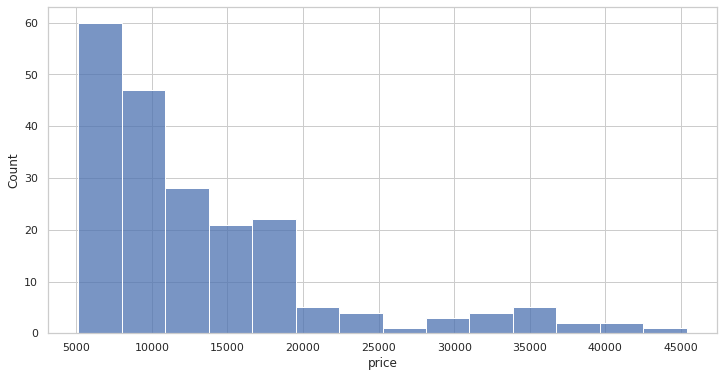

In [28]:
sns.histplot(Y)

In [29]:
y_log = np.log(Y)
y_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

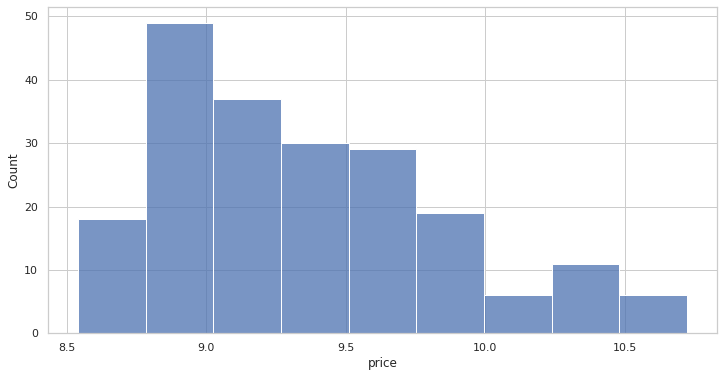

In [30]:
sns.histplot(y_log)

In [31]:
model_log = sm.OLS(y_log, X1).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     77.96
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.19e-88
Time:                        13:41:07   Log-Likelihood:                 174.61
No. Observations:                 205   AIC:                            -255.2
Df Residuals:                     158   BIC:                            -99.04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.63

### Использовать обобщённую линейную модель

In [32]:
model_gamma = sm.GLM(Y, X1, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(model_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  205
Model:                            GLM   Df Residuals:                      158
Model Family:                   Gamma   Df Model:                           46
Link Function:                    log   Scale:                        0.013658
Method:                          IRLS   Log-Likelihood:                -1745.8
Date:                Wed, 29 Nov 2023   Deviance:                       2.1741
Time:                        13:41:15   Pearson chi2:                     2.16
No. Iterations:                    14   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.70